In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data loading
df = pd.read_csv("Smartphone_Usage_Productivity_Dataset_50000.csv", index_col = "User_ID")
df.head()
df.columns = df.columns.str.lower().str.replace(" ","_")

In [56]:
# data understanding
print("Shape: \n",df.shape)
print("Info: \n")
df.info()
print("Description: \n")
df.describe()

Shape: 
 (50000, 12)
Info: 

<class 'pandas.DataFrame'>
Index: 50000 entries, U1 to U50000
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        50000 non-null  int64  
 1   gender                     50000 non-null  str    
 2   occupation                 50000 non-null  str    
 3   device_type                50000 non-null  str    
 4   daily_phone_hours          50000 non-null  float64
 5   social_media_hours         50000 non-null  float64
 6   work_productivity_score    50000 non-null  int64  
 7   sleep_hours                50000 non-null  float64
 8   stress_level               50000 non-null  int64  
 9   app_usage_count            50000 non-null  int64  
 10  caffeine_intake_cups       50000 non-null  int64  
 11  weekend_screen_time_hours  50000 non-null  float64
dtypes: float64(4), int64(5), str(3)
memory usage: 5.0+ MB
Description: 



,age,daily_phone_hours,social_media_hours,work_productivity_score,sleep_hours,stress_level,app_usage_count,caffeine_intake_cups,weekend_screen_time_hours
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,39.034960,6.509116,4.267250,5.503760,6.497744,5.504500,32.43898,3.004580,8.006844
std,12.414877,3.170903,2.164743,2.874806,1.449551,2.871095,16.12151,1.996657,3.461300
min,18.000000,1.000000,0.500000,1.000000,4.000000,1.000000,5.00000,0.000000,2.000000
25%,28.000000,3.800000,2.400000,3.000000,5.200000,3.000000,18.00000,1.000000,5.000000
50%,39.000000,6.500000,4.300000,5.500000,6.500000,6.000000,32.00000,3.000000,8.000000
75%,50.000000,9.200000,6.100000,8.000000,7.800000,8.000000,46.00000,5.000000,11.000000
max,60.000000,12.000000,8.000000,10.000000,9.000000,10.000000,60.00000,6.000000,14.000000


In [57]:
# <- data cleaning ->
df.isnull().sum()
#no null values in any column, thus no need for replacinf null values

age                          0
gender                       0
occupation                   0
device_type                  0
daily_phone_hours            0
social_media_hours           0
work_productivity_score      0
sleep_hours                  0
stress_level                 0
app_usage_count              0
caffeine_intake_cups         0
weekend_screen_time_hours    0
dtype: int64

In [58]:
#removing duplicates
df = df.drop_duplicates()

In [62]:
# <- adding columns ->

#phone usage - low, medium, high
df["phone_usage_category"] = pd.cut(
    df["daily_phone_hours"],
    bins = [0,3,6,10],
    labels = ["Low","Medium","High"]
)

#sleep health - poor, good
df["sleep_health"] = np.where(df["sleep_hours"] < 6, "Poor", "Good")

#risk score
df["risk_score"] = (
    df["daily_phone_hours"]/df["daily_phone_hours"].max() +
    (1 - df["sleep_hours"]/df["sleep_hours"].max()) +
    df["stress_level"]/df["stress_level"].max()
).round(2)

#risk level - risk score ranges from 0 to 3 -> low, medium, high
df["risk_level"] = pd.qcut(df["risk_score"], 3, labels=["Low","Medium","High"])
df.head()

,age,gender,occupation,device_type,daily_phone_hours,social_media_hours,work_productivity_score,sleep_hours,stress_level,app_usage_count,caffeine_intake_cups,weekend_screen_time_hours,phone_usage_category,sleep_health,risk_score,risk_level
User_ID,,,,,,,,,,,,,,,,
U1,58,Male,Professional,Android,1.3,6.7,6,8.8,4,42,1,8.7,Low,Good,0.53,Low
U2,25,Male,Professional,Android,1.2,1.5,5,6.4,1,51,3,5.1,Low,Good,0.49,Low
U3,19,Male,Student,iOS,5.3,5.7,5,9.0,4,14,5,6.3,Medium,Good,0.84,Low
U4,35,Female,Business Owner,iOS,5.8,2.5,2,5.7,3,36,6,12.8,Medium,Poor,1.15,Low
U5,33,Male,Freelancer,Android,7.9,1.3,4,5.7,3,37,5,9.9,High,Poor,1.32,Medium


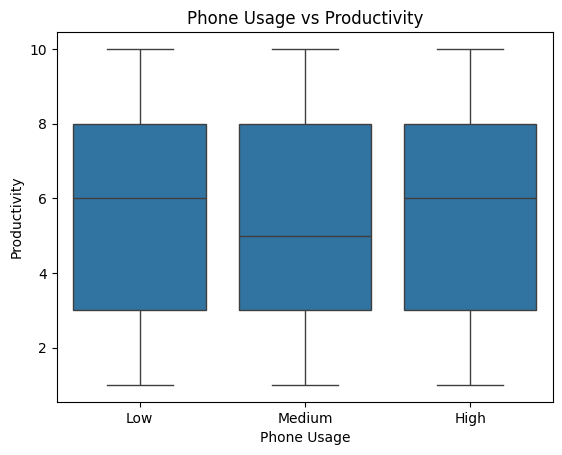

In [87]:
# data visualiztion

# Does higher smartphone usage reduce productivity?
sns.boxplot(x="phone_usage_category", y="work_productivity_score", data=df)
plt.title("Phone Usage vs Productivity")
plt.xlabel("Phone Usage")
plt.ylabel("Productivity")
plt.show()
# Medium phone users show the lowest typical productivity.
# Low and High users appear similar at the median level.
# This means there is no strong trend that high phone usage results in low productivity.
# So, there must be other factors in consideration like sleep, stress, occupation, etc.

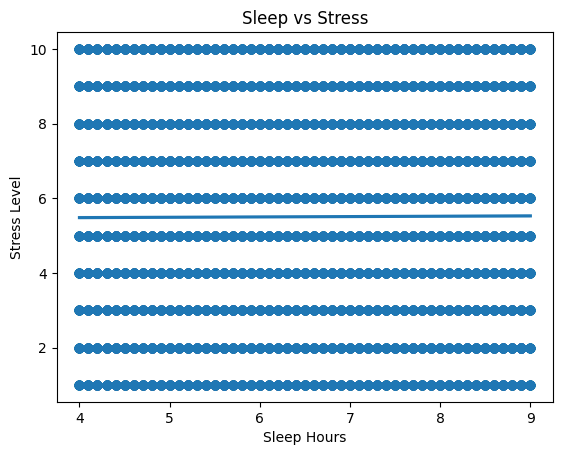

In [88]:
#Is sleep related to stress?
sns.regplot(x="sleep_hours", y="stress_level", data=df)
plt.title("Sleep vs Stress")
plt.xlabel("Sleep Hours")
plt.ylabel("Stress Level")
plt.show()
# The points form horizontal bands, meaning stress only takes discrete values (1–10).
# For every sleep duration (4–9 hours), all stress levels appear.
# The regression line is almost flat.
# There is no visible downward or upward trend.

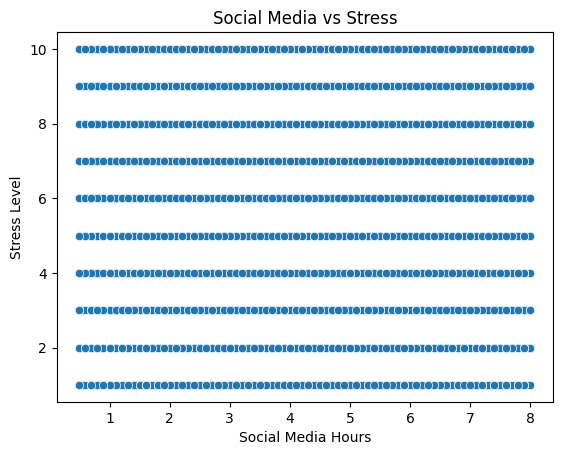

In [89]:
# Do social media and gaming increases stress?
sns.scatterplot(x="social_media_hours", y="stress_level", data=df)
plt.title("Social Media vs Stress")
plt.xlabel("Social Media Hours")
plt.ylabel("Stress Level")
plt.show()
# For every amount of social media usage, all stress levels (1–10) are present.
# There is no visible upward or downward trend.
# The cloud does not tilt.
# This means social media hours do not predict stress in this dataset.

In [90]:
# Who are the high risk users?
df["high_risk"] = np.where(
    (df["daily_phone_hours"] > df["daily_phone_hours"].median()) & 
    (df["sleep_hours"] < df["sleep_hours"].median()), "High Risk", "Low Risk"
)
df.head()
# high_risk 	Emergency alert
# risk_level	Risk management & planning
# high_risk is a fast warning flag, while risk_level is a strategic segmentation metric for monitoring and 
# reducing digital lifestyle risks.

,age,gender,occupation,device_type,daily_phone_hours,social_media_hours,work_productivity_score,sleep_hours,stress_level,app_usage_count,caffeine_intake_cups,weekend_screen_time_hours,phone_usage_category,sleep_health,risk_score,risk_level,high_risk
User_ID,,,,,,,,,,,,,,,,,
U1,58,Male,Professional,Android,1.3,6.7,6,8.8,4,42,1,8.7,Low,Good,0.53,Low,Low Risk
U2,25,Male,Professional,Android,1.2,1.5,5,6.4,1,51,3,5.1,Low,Good,0.49,Low,Low Risk
U3,19,Male,Student,iOS,5.3,5.7,5,9.0,4,14,5,6.3,Medium,Good,0.84,Low,Low Risk
U4,35,Female,Business Owner,iOS,5.8,2.5,2,5.7,3,36,6,12.8,Medium,Poor,1.15,Low,Low Risk
U5,33,Male,Freelancer,Android,7.9,1.3,4,5.7,3,37,5,9.9,High,Poor,1.32,Medium,High Risk


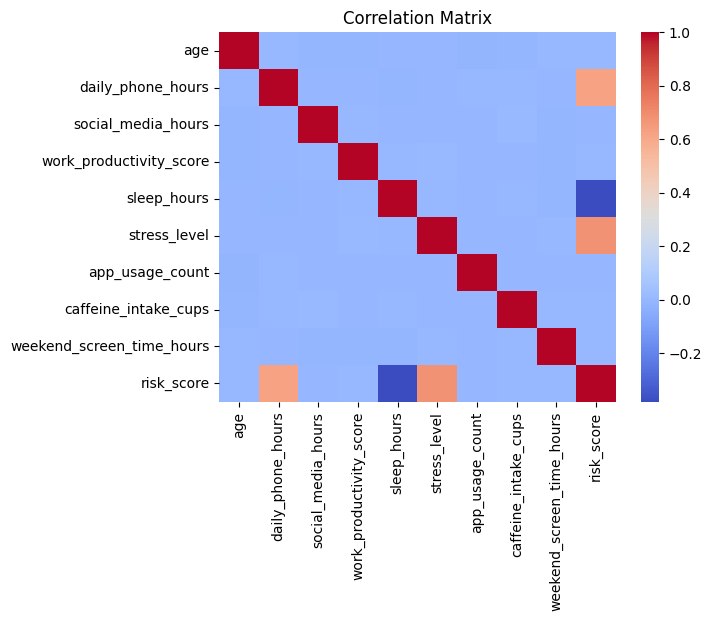

In [97]:
#correlation analysis
numeric_df = df.select_dtypes(include=["int64", "float64"])
sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
# Relationship	                       Interpretation
# risk_score ↔ daily_phone_hours	       Strong positive → More phone use = higher risk
# risk_score ↔ stress_level	           Strong positive → More stress = higher risk
# risk_score ↔ sleep_hours	           Strong negative → Less sleep = higher risk
# So:
# Risk score is influenced by phone usage, stress, and sleep.
# Most features show weak pairwise correlations, but risk score is strongly driven by phone usage, 
# stress, and lack of sleep, indicating it is a multi-factor outcome.